In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import seaborn as sns

dataset = pd.read_csv('C:/Users/JH/Desktop/price/PriceEng.csv', encoding='utf-8-sig', thousands=',', index_col='Unnamed: 0')
df = dataset.loc[:,['piecemaker','ambition','Awakening','sharpblunt','soulabsorption']]

model = ols('piecemaker ~ ambition + Awakening + sharpblunt +soulabsorption', df)
res = model.fit()

In [22]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             piecemaker   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     43.62
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           2.06e-07
Time:                        16:53:27   Log-Likelihood:                -106.85
No. Observations:                  18   AIC:                             223.7
Df Residuals:                      13   BIC:                             228.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1787.1227    792.058      2.

In [ ]:
# R-squared 값이 높은데 특정독리 변수들의 p - value 가 상당히 높음을 볼 수 있다.
# 다중공선성을 의심해볼 필요가 있다.

In [23]:
#다중공선성을 확인하기 위한 VIF 계산
for i in range(4):
    print(variance_inflation_factor(model.exog, i)) 


972.9309863143253
11.4549677088088
3.2666448538366257
15.053507951389355


In [ ]:
# VIF > 10 이면, 다중공선성 가능성 굉장히 높음
# 다중공선성을 해결하는 방법은 여러가지가 있다고 한다.
# 1. 독립변수 제거, 2. 독립변수 변형 or 관측치 추가 3. 주성분 분석 사용

# 나는 그중에 2. 독립변수 변형, 더 자세히는 독립변수를 가격에서 가격의 변화율로 변경해보았다.

In [6]:
#독립변수들을 가격에서 변화율로 변경

dataset = pd.read_csv('C:/Users/JH/Desktop/price/pricePctChange.csv', encoding='utf-8-sig', thousands=',', index_col='Unnamed: 0')
df = dataset.loc[:,['piecemaker','ambition','Awakening','sharpblunt','soulabsorption']]

model = ols('piecemaker ~ ambition + Awakening + sharpblunt + soulabsorption', df)
res = model.fit()

for i in range(4):
    print(variance_inflation_factor(model.exog, i)) 

1.2150449646215815
3.560784332504824
2.6671858878306565
3.26035216474704


In [ ]:
# VIF < 10 다중공선성 해결

In [25]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             piecemaker   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     43.62
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           2.06e-07
Time:                        16:58:27   Log-Likelihood:                -106.85
No. Observations:                  18   AIC:                             223.7
Df Residuals:                      13   BIC:                             228.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1787.1227    792.058      2.

In [ ]:
# 다중공선성외에도 

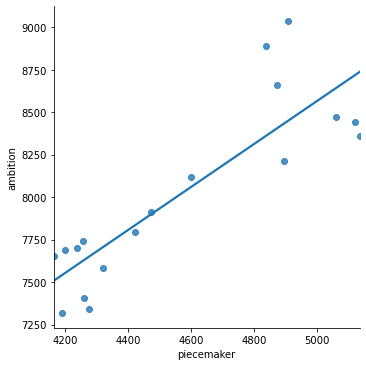

In [26]:
sns.lmplot(x='piecemaker', y='ambition',data = df, ci = None)